In [28]:
import json
import sys
sys.path.append('/Users/esthermax-onakpoya/Documents/LowCostSC/low_cost_smart_city_optimization')
import sim
import collections
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from collections import defaultdict as dd
from os import listdir
from matplotlib import ticker

In [29]:
data = collections.defaultdict(list)
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) #rc={"lines.linewidth": 2.5})
results_folder= "../results/paper/cht"
# results_folder= "results/thesis/cht/budget"
#results_folder= "results/thesis/louisville/budget"
listdir(results_folder)

['celf', 'betweenness', '.DS_Store', 'indegree']

In [30]:
from collections import defaultdict
cities = defaultdict(dict)

for sub_folder in listdir(results_folder):
    
    if sub_folder=='.DS_Store':
        continue
        
    if not (sub_folder in ["celf", "indegree", "betweenness"]):#["betweenness", , "celf"]):
        continue
        
    print(sub_folder)
    dirr = "{0}/{1}/".format(results_folder,sub_folder)
    r = listdir(dirr)
    groups = {}
    linestrings = {}
    s_string = ""
    end1_start2 =dd(list)

    all_budgets = set()
    
    ons, ons_msgs, ons_wait_times, ons_route_times = defaultdict(list),defaultdict(list),defaultdict(list),defaultdict(list)
    total_generated, total_delivered = defaultdict(int),defaultdict(int)
    
    total_delay, delivered_gen, total_gen = defaultdict(int),defaultdict(int),defaultdict(int)
    
    for x in r[:]:
        if x=='.DS_Store':
            continue
        budget = int(x.split("_")[-3][6:])
        all_budgets.add(budget)
        
        
        with open(dirr + x, 'r', encoding='utf-8') as json_file:
             
            result = json.load(json_file)

            for d in result['ons']:
                l = np.array(d['all_latencies'], dtype=float)
                #for delay graph
                l[np.isnan(l)] = sim.upper_bound_delay
                median = np.nanmedian(l)
                mean = np.nanmean(l)
                temp = {
                        'Median Delay (minutes)': median /60,
                        'Median Delay (hours)': median /60/60,
                        'Mean Delay (minutes)': mean /60,
                        'mean Delay (hours)': mean /60/60,
                        'delivery_rate': d['delivery_rate']
                        }

                #print(budget)
                ons[budget].append(temp)
                ons_msgs[budget].extend([val/60 for val in l])


                for i in range(len(d['all_waiting_times'])):
                    ons_wait_times[budget].append(d['all_waiting_times'][i])
                    
                    if d['all_waiting_times'][i] == None:
                        ons_route_times[budget].append(None)
                    else: 
                        ons_route_times[budget].append(d['all_latencies'][i] - d['all_waiting_times'][i])
                        
                total_generated[budget] += len(d['all_gen_times'])
                total_delivered[budget] += len(d['delivered_gen_times'])
                
                total_delay[budget] += result['total_delay']
                delivered_gen[budget] += result['delivered_gen']
                total_gen[budget] = result['total_gen']


    all_budgets = sorted(list(all_budgets))
    for b in all_budgets:
        #print(b, np.nanmean(ons_msgs[b]))
        ons_msgs[b] = np.array(ons_msgs[b], dtype=float)
        ons_wait_times[b] = np.array(ons_wait_times[b], dtype=float)/60
        ons_route_times[b] = np.array(ons_route_times[b], dtype=float)/60

#     ons_msgs = [np.array(x, dtype=float) for x in ons_msgs]
#     ons_wait_times = [np.array(x, dtype=float)/60 for x in ons_wait_times]
#     ons_route_times = [np.array(x, dtype=float)/60 for x in ons_route_times]
    
    
#     ons_msgs = [np.array(x, dtype=float) for b in range(len(ons_msgs)) for x in ons_msgs[b]]
#     ons_wait_times = [[np.array(x, dtype=float)/60 for b in range(len(ons_wait_times))] for x in ons_wait_times[b]]
#     ons_route_times = [[np.array(x, dtype=float)/60 for b in range(len(ons_route_times))] for x in ons_route_times[b]]
    
    
    for b in all_budgets:
        cities[sub_folder][b] = {
            'ons': ons[b],
            'ons_msgs': ons_msgs[b],
            'ons_wait_times': ons_wait_times[b],
            'ons_route_times': ons_route_times[b],
            'df1': pd.DataFrame(ons[b]),
            'df2': pd.DataFrame(
                {
                    'wait_times': ons_wait_times[b],
                    'route_times': ons_route_times[b]
                }
            ),
            'total_generated': total_generated[b],
            'total_delivered': total_delivered[b],
            'total_delay': total_delay[b], 
            'delivered_gen': delivered_gen[b] ,
            'total_gen': total_gen[b]
        }
    

sns.set(font_scale=1.6, style="whitegrid") 
plt.subplots_adjust(hspace=0.35, wspace=0.2)

print(all_budgets)

celf


/Users/esthermax-onakpoya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice


betweenness
indegree
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


<Figure size 432x288 with 0 Axes>

In [31]:
for k,v in cities.items():
    v["mean_budget_delays_per_sensor"] = []
    v["median_budget_delays_per_sensor"] = []
    v["mean_budget_delays"] = []
    v["median_budget_delays"] = []
    v["mean_delivery_rate_per_sensor"] = []
    v["cummulative_delivery_rate"] = []
    v["budget_delays"] = []
    
    v['total_mean_delay'] = []
    v['total_median_delay'] = []
    v['total_delivery_rate'] = []
        
#     total_delay = 0
#     total_generated = 0
#     total delivered = 0
    for b in all_budgets:
        v["mean_budget_delays_per_sensor"].append(np.nanmean(v[b]['df1']['Mean Delay (minutes)']))
        v["median_budget_delays_per_sensor"].append(np.nanmedian(v[b]['df1']['Median Delay (minutes)']))
        v["mean_budget_delays"].append(np.nanmean(v[b]['ons_msgs']))
        v["budget_delays"].append(v[b]['ons_msgs'])
        v["median_budget_delays"].append(np.nanmedian(v[b]['ons_msgs']))
        v["mean_delivery_rate_per_sensor"].append(np.nanmean(v[b]['df1']['delivery_rate']))
        v["cummulative_delivery_rate"].append(v[b]['total_delivered']/v[b]['total_generated'])
        
#         total_delay = 0
#         total_generated = 0
#         total delivered = 0
        
        v['total_mean_delay'].append(v[b]['total_delay'] / v[b]['total_gen'])
        v['total_median_delay'] = total_delay[b]
        v['total_delivery_rate'].append(v[b]['delivered_gen'] / v[b]['total_gen'])

#     print(k, v["mean_budget_delays_per_sensor"], v["median_budget_delays_per_sensor"])
#     print(v["mean_budget_delays"], v["median_budget_delays"])
#     print(v["median_delivery_rate_per_sensor"], v["cummulative_delivery_rate"])

In [32]:
cities["indegree"]["mean_budget_delays"]

[1156.8952228307537,
 802.7863532053078,
 517.3699260154117,
 516.3880782527999,
 512.3932737784891,
 511.82795015060407,
 511.3179721290848,
 510.6271485818912,
 510.10183143160384,
 491.41079049637625,
 490.64931601898917,
 490.53513145118814,
 490.4695753222728,
 490.4290337643832,
 490.42147582369415]

[122.45573038970139, 69.72047944609918, 64.14598376206673, 59.913801651157776, 55.310848959213175, 55.22709092448328, 54.030096499240926, 52.919047619047625, 52.736780159730976, 52.059459576768646, 51.105094130675525, 50.942909876880876, 50.7662930371434, 50.59009457441513, 48.41663340814341]
[177.0333367315022, 174.00557281737338, 100.0281320317594, 99.72047944609918, 99.72047944609918, 99.72047944609918, 99.44695068935536, 95.03532876337474, 94.0, 94.0, 92.48427005472409, 92.48427005472409, 92.30061232300038, 92.26326530612245, 63.035765568504225]
[1560.0, 385.3503624494452, 89.2874607833535, 88.38580691348791, 87.48227802285159, 86.96232239205364, 86.38580691348791, 85.36037783701305, 84.36836178283548, 81.71875, 80.3963237230501, 80.3006123230004, 80.25802539015122, 80.23577624975215, 80.23577624975215]


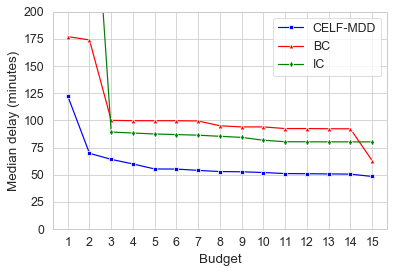

In [33]:
#plt.axes(figsize=(10,10))
sns.set_context("paper", font_scale=1.4) #rc={"lines.linewidth": 2.5})
algos = ['celf', 'betweenness', 'indegree']

x_axis = range(all_budgets[0], all_budgets[-1]+1)

#attribute = "mean_budget_delays_per_sensor"
#attribute = "median_budget_delays_per_sensor"
#attribute = "mean_budget_delays"
attribute = "median_budget_delays"
#attribute = "mean_delivery_rate_per_sensor"
#attribute = "cummulative_delivery_rate"
#attribute = "total_delivery_rate"
#attribute = "total_mean_delay"

y = cities["celf"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='blue', marker="s", label="CELF-MDD")
print(y)

y = cities["betweenness"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='red', marker="^", label="BC")
print(y)

y = cities["indegree"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='green', marker="d", label="IC")
print(y)

# #x,y = process(closeness)
# #ax = sns.lineplot(x=x, y =y, color='purple', label="closeness")


#ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set(ylim=(0, 200))
ax.set_xlabel("Budget")
ax.set_ylabel("Median delay (minutes)")
plt.savefig('../images/budget_med_delay_cht.png', dpi=90)

In [34]:
plt.savefig?

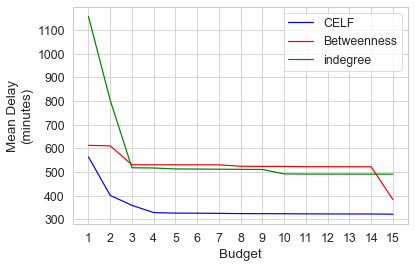

In [35]:
#plt.axes(figsize=(10,10))
sns.set_context("paper", font_scale=1.4) #rc={"lines.linewidth": 2.5})
algos = ['celf', 'betweenness', 'indegree']

x_axis = range(all_budgets[0], all_budgets[-1]+1)

#attribute = "mean_budget_delays_per_sensor"
#attribute = "median_budget_delays_per_sensor"
attribute = "mean_budget_delays"
#attribute = "median_budget_delays"
#attribute = "mean_delivery_rate_per_sensor"
#attribute = "cummulative_delivery_rate"
#attribute = "total_delivery_rate"
#attribute = "total_mean_delay"

y = cities["celf"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='blue', label="CELF")

y = cities["betweenness"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='red', label="Betweenness")

y = cities["indegree"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='green', label="indegree")

# #x,y = process(closeness)
# #ax = sns.lineplot(x=x, y =y, color='purple', label="closeness")


ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_xlabel("Budget")
ax.set_ylabel("Mean Delay\n(minutes)")
plt.savefig('../images/budget_mean_delay_cht.png', dpi='figure')

NameError: name 'tips' is not defined

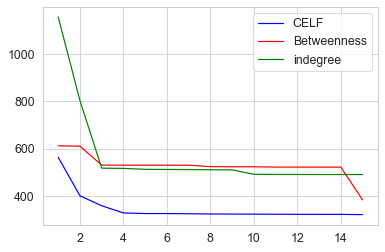

In [36]:
#plt.axes(figsize=(10,10))
sns.set_context("paper", font_scale=1.4) #rc={"lines.linewidth": 2.5})
algos = ['celf', 'betweenness', 'indegree']

x_axis = range(all_budgets[0], all_budgets[-1]+1)

y = cities["celf"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='blue', label="CELF")

y = cities["betweenness"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='red', label="Betweenness")

y = cities["indegree"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='green', label="indegree")

# #x,y = process(closeness)
# #ax = sns.lineplot(x=x, y =y, color='purple', label="closeness")

sns.boxplot(x=x_axis, y="budget_delays",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

# #ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# ax.set_xlabel("Budget")
# ax.set_ylabel("Mean Delay\n(minutes)")
# plt.savefig('budget_mean_delay_cht.png', dpi=150)

In [37]:
sns.boxplot??

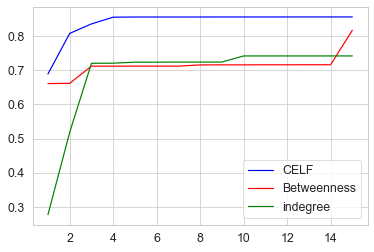

In [38]:
#plt.figure(figsize=(10,10))
algos = ['celf', 'betweenness', 'indegree']

x_axis = range(all_budgets[0], all_budgets[-1]+1)

#attribute = "mean_budget_delays_per_sensor"
#attribute = "median_budget_delays_per_sensor"
#attribute = "mean_budget_delays"
#attribute = "median_budget_delays"
#attribute = "mean_delivery_rate_per_sensor"
attribute = "cummulative_delivery_rate"
#attribute = "total_delivery_rate"
#attribute = "total_mean_delay"

y = cities["celf"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='blue', label="CELF")

y = cities["betweenness"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='red', label="Betweenness")

y = cities["indegree"][attribute]
ax = sns.lineplot(x=x_axis, y =y, color='green', label="indegree")

# #x,y = process(closeness)
# #ax = sns.lineplot(x=x, y =y, color='purple', label="closeness")


# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# ax.set_xlabel("Budget")
# ax.set_ylabel("Delivery Ratio")
# plt.savefig('budget_delivery_cht.png', dpi=150)

In [39]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
#plt.subplots_adjust(hspace=0.35, wspace=0.2)

ax = [len(cities)]
i = 0

for k,v in cities.items():
    #row,column = i//2, i%2
    #ax = sns.distplot(v['df1']['Median Delay (minutes)'].dropna(), ax=axarr[row][column], bins= 40, kde=False)
    plt.figure(figsize=(10,5))
    ax = sns.distplot(v['df1']['Median Delay (minutes)'].dropna(), bins= 40, kde=False)
    ax.set_title("{0}: {1} sensors".format(k, len(v['df1'])))

    print ('Mean delay (per sensor) for {}: {}'.format(k, np.nanmean(v['df1']['Mean Delay (minutes)'])))
    print ('Median delay (per sensor) for {}: {}'.format(k, np.nanmedian(v['df1']['Median Delay (minutes)'])))
    print()
    
    ax.set_ylabel('Frequency')
    i +=1
    plt.plot()
#fig.savefig('delays.png', dpi=300)

KeyError: 'df1'

<Figure size 720x360 with 0 Axes>

In [ ]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
plt.subplots_adjust(hspace=0.35, wspace=0.2)

i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    
    ax = sns.distplot(v['ons_msgs'],  kde=False, bins= 60)
    ax.set_title("{0}: {1} data packets".format(k, len(v['ons_msgs'])))
    #ax.figure.set_size_inches((10,5))
    ax.set_xlabel('Median Delay (minutes)'), ax.set_ylabel('Frequency')
    print ('Mean delay (per packet) for {}: {}'.format(k, np.nanmean(v['ons_msgs'])))
    print ('Median delay (per packet) for {}: {}'.format(k, np.nanmedian(v['ons_msgs'])))
    print()
    
    
    plt.plot()
    
    
    i +=1
#fig.savefig('delays2.png', dpi=300)

In [ ]:
i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    
    a = v['ons_wait_times'][~np.isnan(v['ons_wait_times'])]
    b = v['ons_route_times'][~np.isnan(v['ons_route_times'])]
    
    ax = sns.boxplot(
        x=['Sensor \u2192 Bus','Bus \u2192 Gateway'],
        y=[a, b]
    )
    ax.set_ylabel('Delay (Minutes)')
    ax.figure.set_size_inches((5,5))
    ax.set_title(k + ": Delays for on-route packets")
    ax.figure.savefig('e.png', dpi=300)

    print("For {}".format(k), "\n")
    print(
        "Sensor->Bus \nMean: {0}, Median: {1}".format(
            np.nanmean(v['ons_wait_times']), 
            np.nanmedian(v['ons_wait_times'])
        )
    )
    
    print(
        "Bus->Gateway \nMean: {0}, Median: {1}".format(
            np.nanmean(v['ons_route_times']),
            np.nanmedian(v['ons_route_times'])
        )
    )
    print('\n\n')

In [ ]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
#plt.subplots_adjust(hspace=0.35, wspace=0.2)

ax = [len(cities)]
i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    ax = sns.distplot(v['df1']['delivery_rate'].dropna(), bins= 40, kde=False)
    ax.set_title("{0}: {1} sensors".format(k, len(v['df1'])))
    
    print ('Median delivery rate (per sensor) for {}: {}'.format(k, np.nanmedian(v['df1']['delivery_rate'])))
    print ('Cummulative delivery rate for {}: {}'.format(k, v['total_delivered']/v['total_generated']))
    print()
    
    ax.set_xlabel('Delivery Rates')
    ax.set_ylabel('Frequency')
    i +=1
    plt.plot()

#fig.savefig('delays.png', dpi=300)